# Prophet Forecasting

## Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
# Plot aesthetics and settings
%matplotlib inline
plt.style.use('seaborn')


# plot function
def std_aesthetics(title='', x_label='', y_label='', h=8, w=16):
    # figure size
    plt.figure(figsize=(w,h))
    
    # Title and labels
    plt.title(title, fontsize=20)
    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)

    # Font sizes




In [3]:
# Importing the dataset
df = pd.read_csv('data/recruited_daily.csv')
df.head()

,date,Patients Recruited
0,2021-01-07,1
1,2021-01-10,2
2,2021-01-11,2
3,2021-01-12,9
4,2021-02-11,6


## Preprocessing

In [4]:
# Change dates to datetime objects
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date                  datetime64[ns]
Patients Recruited             int64
dtype: object

In [5]:
# Rename column names to 'ds' for the dates and 'y' for the values.
# This is for use with prophet
df.columns = ['ds', 'y']

df.head()

,ds,y
0,2021-01-07,1
1,2021-01-10,2
2,2021-01-11,2
3,2021-01-12,9
4,2021-02-11,6


In [6]:
# Creating a train-test split for cross validation
# Dates start at Jan 2021 and end Dec 2022 
cut_off_date = '2022-06-01'

# Splitting the dataset based on the above cut off date
train_df = df.loc[df['ds'] < cut_off_date]
test_df = df.loc[df['ds'] >= cut_off_date]

# Output some metrics about the split

train_df_len = train_df.shape[0]
test_df_len = test_df.shape[0]
print(f"length of train :{train_df_len}, length of test: {test_df_len}")
print(f"percentage of data = { round((train_df_len/df.shape[0]) *100)}% train / { round((test_df_len/df.shape[0]) *100)}% test")
print(f"number of months in test: { (test_df['ds'].max() - test_df['ds'].min()) /np.timedelta64(1, 'M') }")

length of train :202, length of test: 83
percentage of data = 71% train / 29% test
number of months in test: 6.242427975933797


In [7]:
# Create a new dataframe with resampled dates as monthly aggregates

# Function will take a dataframe in the format that prophet requires with columns titled 'ds' and 'y' for dates and values
# Function will return dataframe with monthly aggregated dates
def month_resample(data):
    resampled_data = data.set_index('ds').resample('M').sum()
    resampled_data = resampled_data.reset_index()
    
    return resampled_data

df_monthly = month_resample(df)
train_df_monthly = month_resample(train_df)
test_df_monthly = month_resample(test_df)

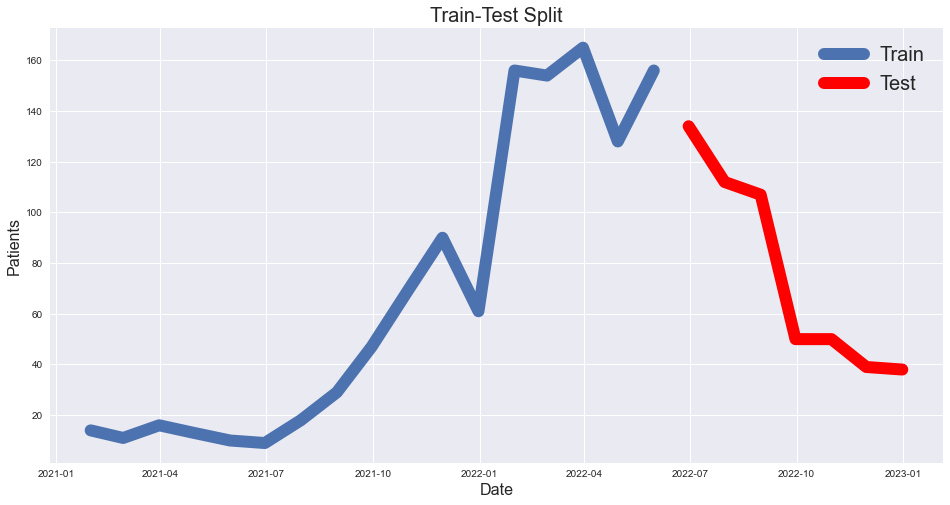

In [8]:
# Plot of the train-test split

# Plot aesthetics
std_aesthetics(title='Train-Test Split', x_label='Date', y_label='Patients')

# Plot of the train test split
plt.plot(train_df_monthly['ds'], train_df_monthly['y'], linewidth=12)
plt.plot(test_df_monthly['ds'], test_df_monthly['y'], linewidth=12, color='red')

# Legend
plt.legend(["Train", "Test"], fontsize=20)



plt.show()

## Forecasting

**To-do:** <br>
1. Compare those predictions with the actual values. Use RMSE 
2. Then forecast for a prediction 6-12 months beyond the last month in the test dataset.
3. End with some commentary about the predictions and a mention of the caveats.
<br><br><br>

**Things to understand:**
- What is an additive model
- what are the alternatives to prophet and why choose them instead of prophet or vice versa.
- Why doesn't prophet require preprocessing?
- How to use the holidays feature of prophet 

In [9]:
# # Create an instance of an 'empty' model
# m = Prophet(interval_width=0.95)

# # Train the model
# model = m.fit(train_df_monthly)

# # Creating the future dates to forecast
# future_dates = model.make_future_dataframe(periods=7, freq='M')
# future_dates

In [10]:
# # Forecasting output
# forecast = model.predict(future_dates)
# forecast

In [11]:
# # Forecast plot
# model.plot(forecast)

# # Actual values plot
# plt.scatter(test_df_monthly['ds'], test_df_monthly['y'], linewidth=0.5, color='red')


# # Title and labels
# plt.title("Forecast with Actual Values", fontsize=20)
# plt.xlabel("", fontsize=16)
# plt.ylabel("", fontsize=16)

# # Legend
# plt.legend(["Training Data", "Regression Line", "Confidence interval???", "Actual Values"])


# plt.show()

Some notes about what Prophet is doing: <br>
You'll note that I've made no attempt at making the data stationary before shoving it into a model, but apparently the model that prophet is using isn't concerned with stationarity... <br>
*"No. Stationarity is an important condition for some other time series forecasting algorithms such as ARMA or ARIMA, but prophet assumes nothing about stationarity. Prophet rather makes use of features like trend or seasonality, which stationary data by definition do not have"*
<br><br>
I'll probably want to learn how to intepret the plot and dataframe that prophet has output above, next.
...

17:38:47 - cmdstanpy - INFO - Chain [1] start processing
17:38:47 - cmdstanpy - INFO - Chain [1] done processing


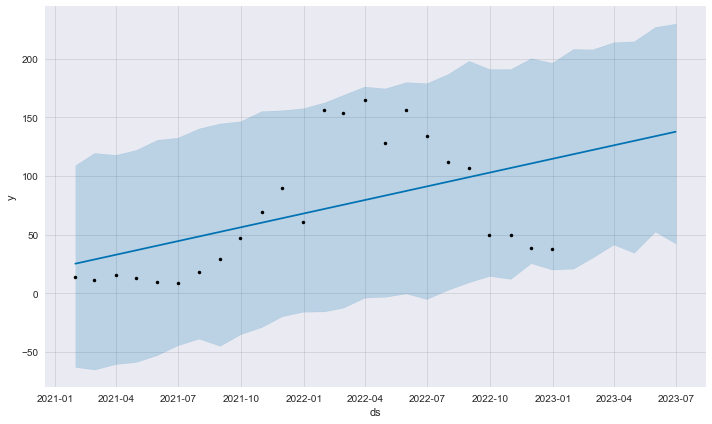

In [18]:
# Create an instance of an 'empty' model
m2 = Prophet(interval_width=0.95)

# Train the model
modelx = m2.fit(df_monthly)

# Creating the future dates to forecast
future_dates = modelx.make_future_dataframe(periods=6, freq='M')
future_dates

# Forecasting output
forecast = modelx.predict(future_dates)
modelx.plot(forecast)

plt.show()

## Key Improvements & Caveats

There has been terrible model performance. <br>
- What are the predictions and what are their measures of reliability?

<br>
Why has this been the case? <br>
- lack of data. There are only 2 years worth of data and we would like to know what will happen half a year to one year in the future.
- Both years in the data are completely different.
- Is there any seasonality to be seen in the data? I'm not sure that there is. If not then only the trend has anything useful to show.

<br>
What would the next steps look like
- Is there an issue with the data that can be fixed? Maybe a mention of just collecting more data? Would bootsrapping help?
- Would a different model be more useful? XGBoost for example?

I've made a mistake in confusing forecasting with modelling in this project. I do not need a train-test split becuase I am not building a ML model and subsequently do not need to understand how it might perform with data outside of the training data. I am not building a model that will generalise predictions to unforseen data, instead I am taking the data I have and predicting what the value will be in the future. Predictive analysis can be done with forecasting as well as modelling. More generally, you can probably forecast with modelling but forecasting is not the same thing as modelling.